In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
data = pd.read_csv("A:/Programming/Python/NLP/Data files/Time_serires_analysis_data/AirPassengers.csv")
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
data['Month'] = pd.to_datetime(data.Month)
data = data.set_index(data.Month)
data.drop('Month', axis=1, inplace=True)

In [4]:
data.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [5]:
data.dtypes

#Passengers    int64
dtype: object

In [6]:
ts = data['#Passengers']
ts.head(144)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
ts['1960']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [8]:
rcParams['figure.figsize'] = 15, 6

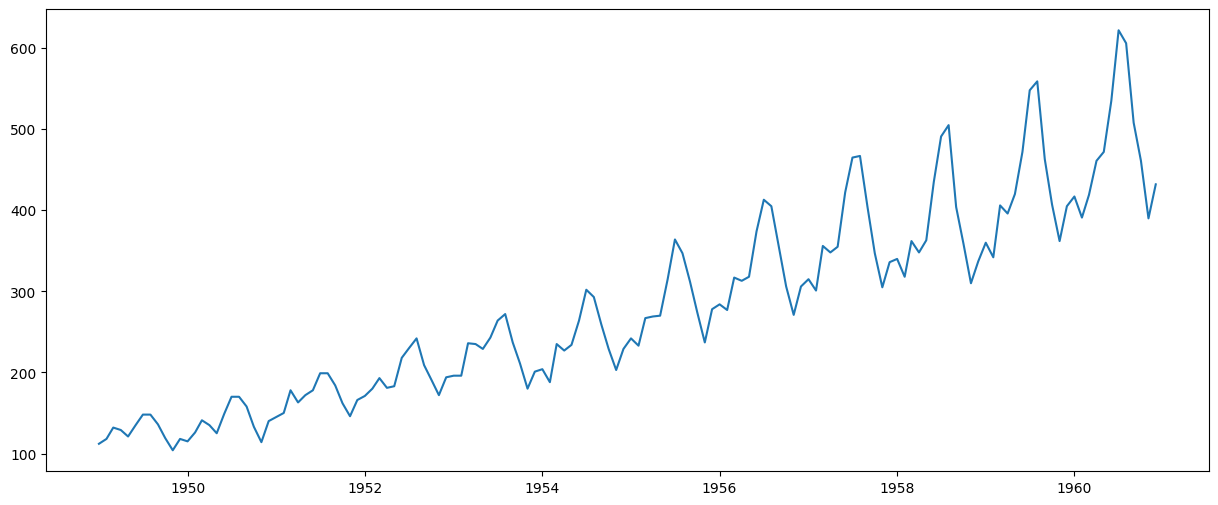

In [9]:
plt.plot(ts)

<Axes: ylabel='Density'>

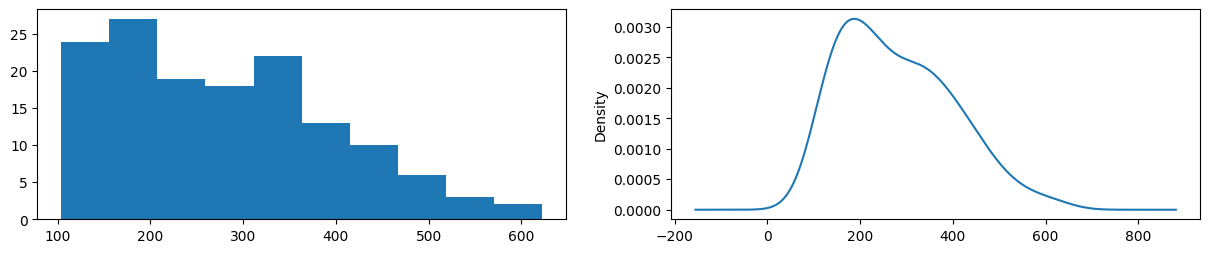

In [10]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind='kde')

In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rollmean = timeseries.rolling(window=12).mean()
    rollstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='original')
    mean_plt = plt.plot(rollmean, color='red', label='rolling mean')
    std_plt = plt.plot(rollstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Rolling Standard deviation")
    plt.show()
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput["Critical value (%s)"%key] = value
    print(dfoutput)

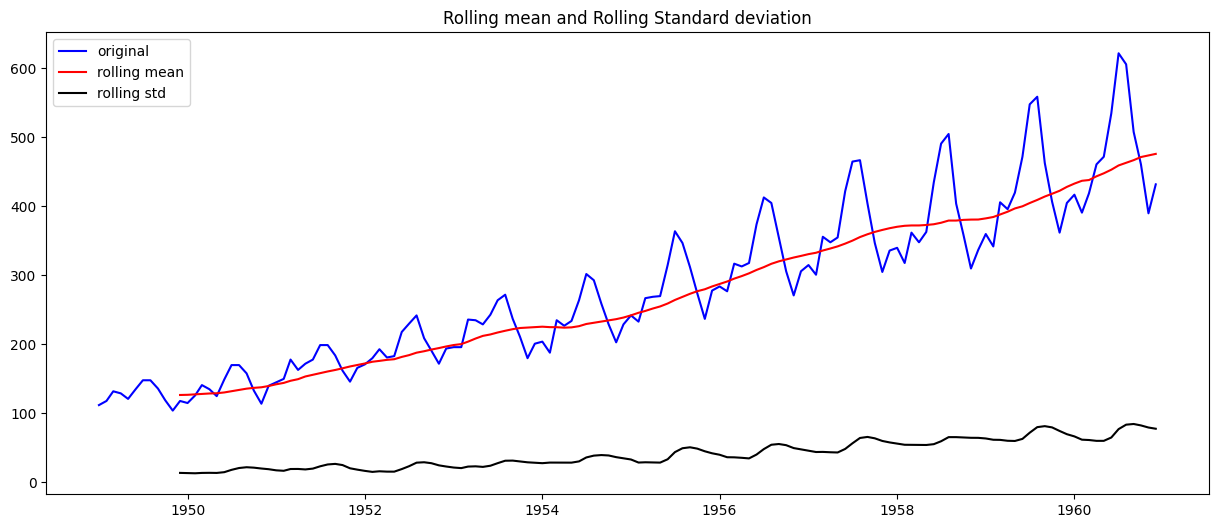

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [12]:
test_stationarity(ts)

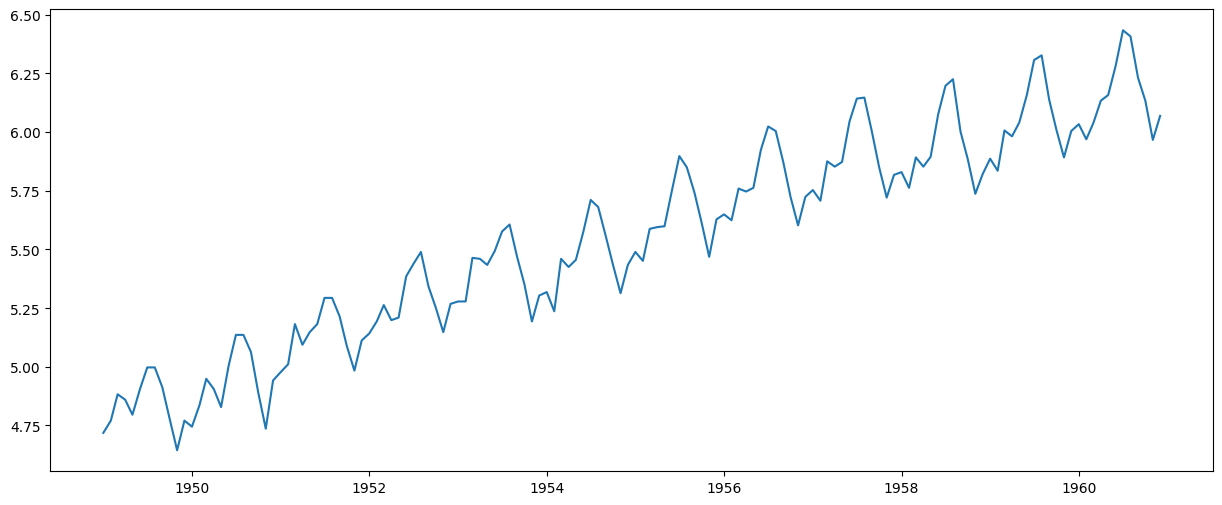

In [13]:
#We will eliminate trend by taking log transform and then smoothing

ts_log = np.log(ts)
plt.plot(ts_log)

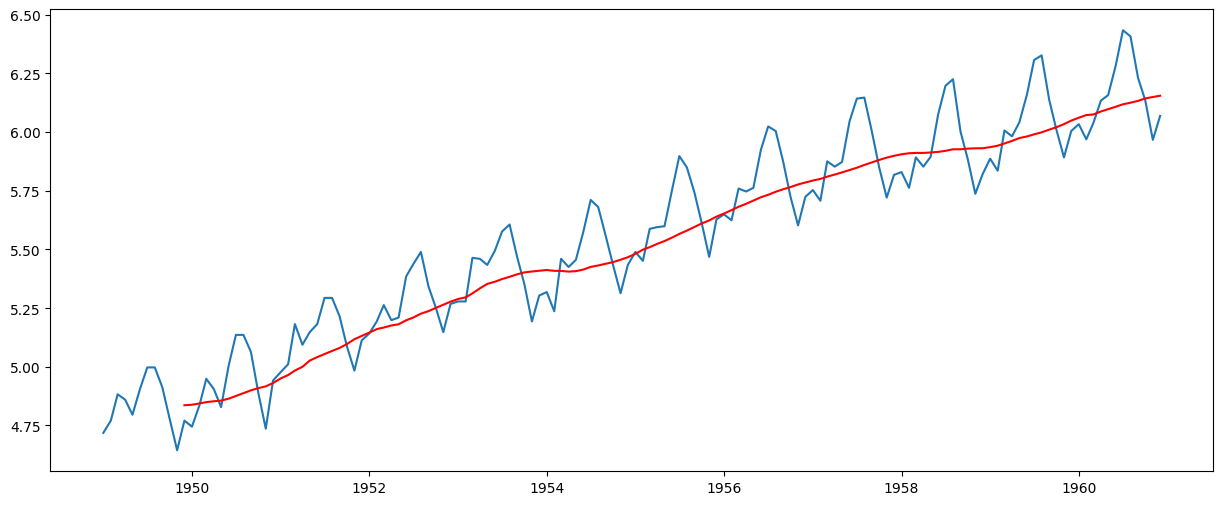

In [14]:
moving_average = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_average, color='red')

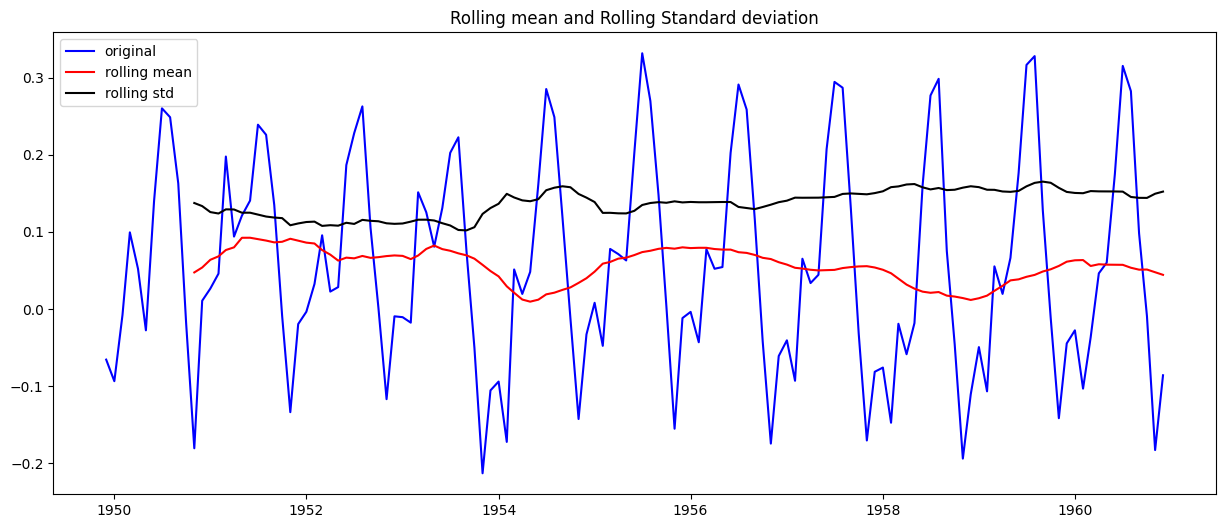

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [15]:
ts_log_mov_avg_dif = ts_log - moving_average
ts_log_mov_avg_dif.dropna(inplace=True)
test_stationarity(ts_log_mov_avg_dif)

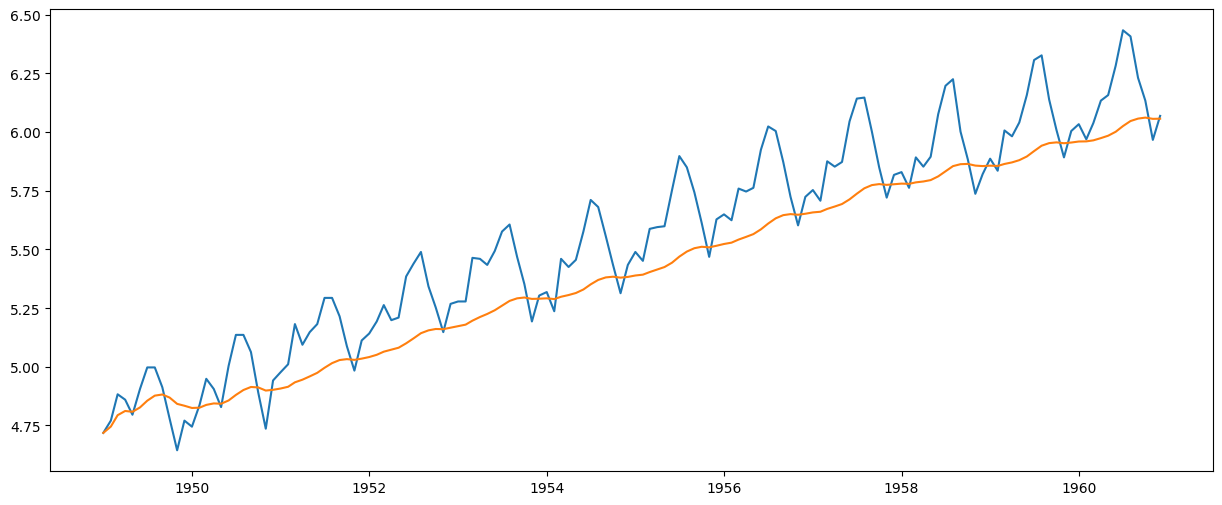

In [17]:
#exponential weighted moving average
ewm_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(ewm_avg)

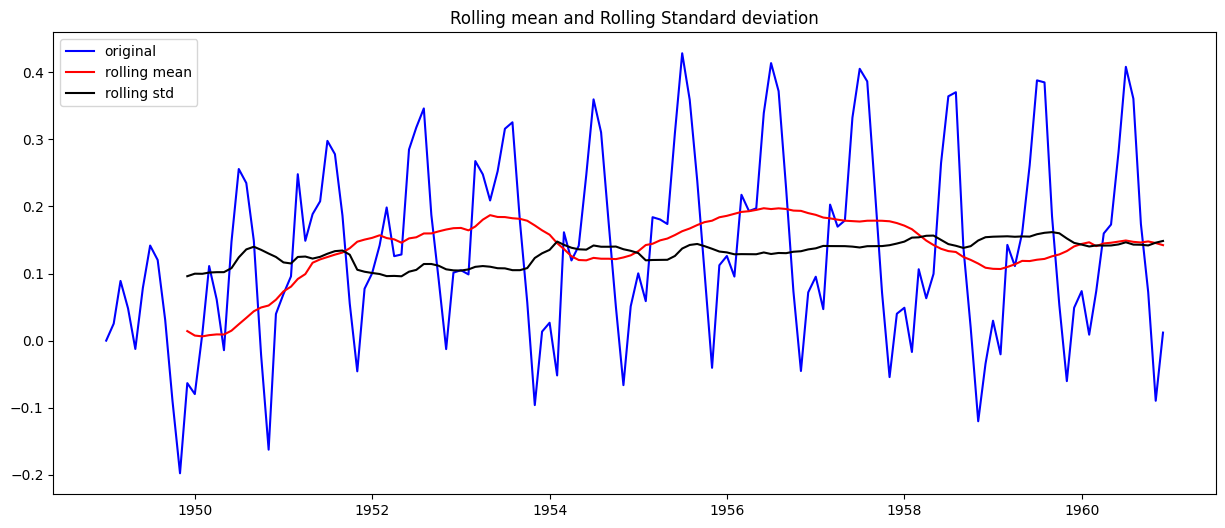

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [19]:
ts_log_ewm_diff = ts_log - ewm_avg
ts_log_ewm_diff.dropna(inplace=True)
test_stationarity(ts_log_ewm_diff)

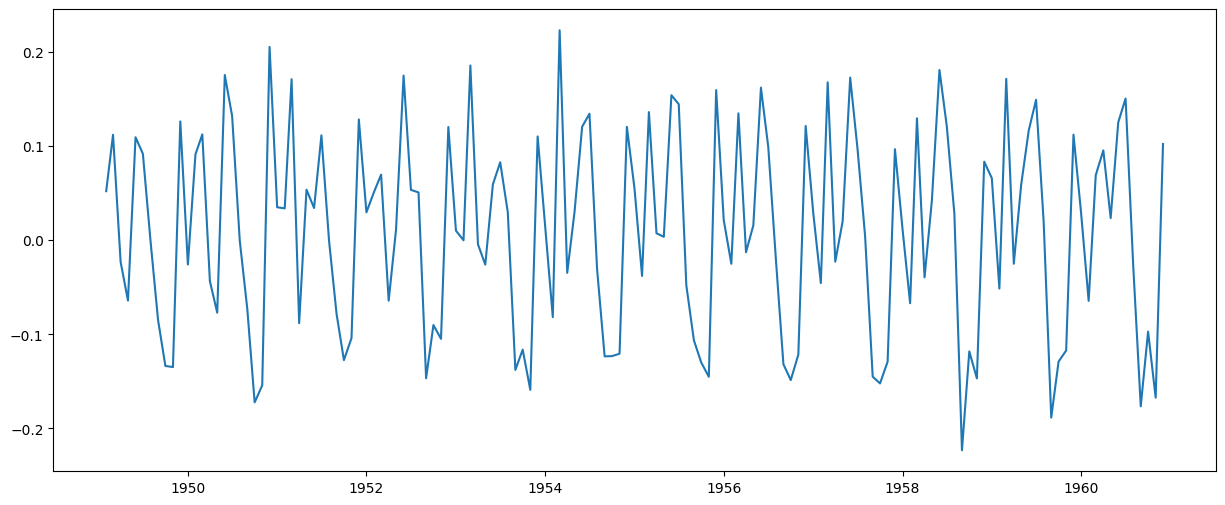

In [21]:
#eliminating trend and seosonality
#differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

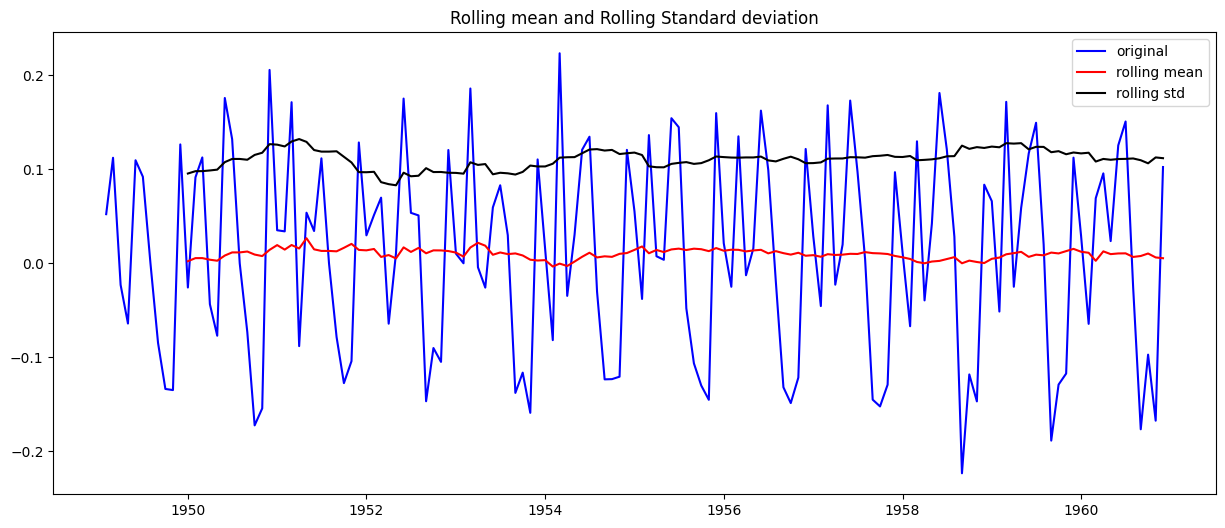

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

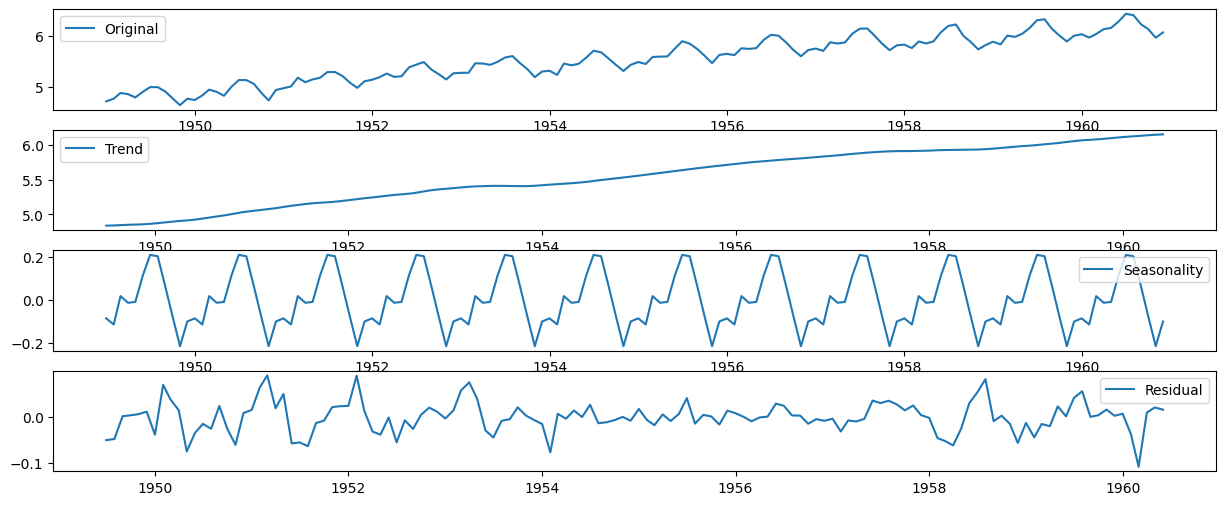

In [26]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_log)
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid
plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

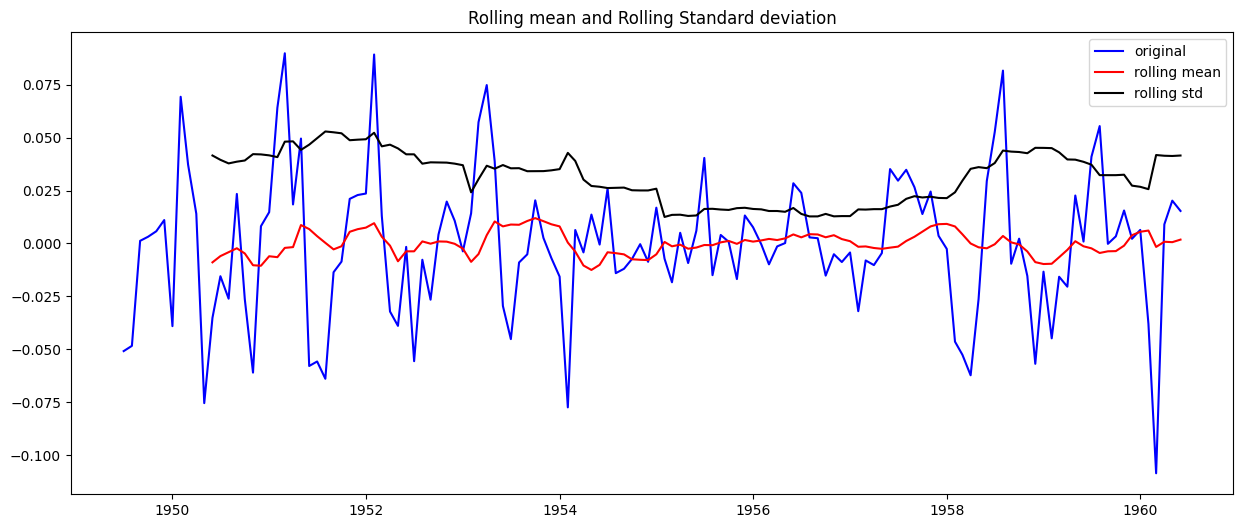

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [28]:
ts_log_decompose_residual = residual
ts_log_decompose_residual.dropna(inplace=True)
test_stationarity(residual)